# Experiment 5 - Bag of Words, Tf-idf and Word Cloud

---

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

tfidfVectorizer = TfidfVectorizer()
countVectorizer = CountVectorizer()

## Loading data

Reading previously extracted tweets

In [2]:
data = pd.read_csv(r'/home/volt/code/cemetery-of-culture/year-3/computational-linguistics/experiment-4/tweets.csv')
data

,Unnamed: 0,context_annotations,created_at,edit_history_tweet_ids,id,text
0,0,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-11-06 17:30:11+00:00,['1589309180527116289'],1589309180527116289,At the heart of every family (if you’re fortun...
1,1,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-11-03 16:00:24+00:00,['1588199421279354881'],1588199421279354881,He was a groundbreaking filmmaker. As well as ...
2,2,"[{'domain': {'id': '29', 'name': 'Events [Enti...",2022-10-31 19:37:31+00:00,['1587166898281623552'],1587166898281623552,RT @MarkRuffalo: Parabéns aos heróis da democr...
3,3,"[{'domain': {'id': '46', 'name': 'Business Tax...",2022-10-28 21:04:25+00:00,['1586101602657648650'],1586101602657648650,"Excelente, @debora_dpio! A melhor estratégia, ..."
4,4,"[{'domain': {'id': '29', 'name': 'Events [Enti...",2022-10-28 20:51:48+00:00,['1586098430363017217'],1586098430363017217,"Eu tô com vocês, @RDJBrazil! Essa semana, esta..."
...,...,...,...,...,...,...
95,95,"[{'domain': {'id': '131', 'name': 'Unified Twi...",2021-08-27 19:02:17+00:00,['1431331249935638529'],1431331249935638529,RT @fp_coalition: Our CO2 emissions are the la...
96,96,"[{'domain': {'id': '131', 'name': 'Unified Twi...",2021-08-25 21:11:46+00:00,['1430639061329268736'],1430639061329268736,Here with our crew over at Bose Downey X=Chang...
97,97,"[{'domain': {'id': '131', 'name': 'Unified Twi...",2021-08-20 18:15:26+00:00,['1428782744134316032'],1428782744134316032,RT @fp_coalition: Here’s @RobertDowneyJr with ...
98,98,"[{'domain': {'id': '131', 'name': 'Unified Twi...",2021-08-18 17:57:25+00:00,['1428053433030905861'],1428053433030905861,"My good friend Valentino Vettori, the mastermi..."


Dropping a redundant column

In [3]:
data = data.drop(['Unnamed: 0'], axis=1)

Storing the tweets in a series

In [4]:
tweets = data['text']

## Bag of Words Model

Creating the bag of words model

In [5]:
bagOfWordsMatrix = countVectorizer.fit_transform(tweets).toarray()

Converting it to a data frame

In [6]:
bagOfWordsDataFrame = pd.DataFrame(bagOfWordsMatrix, columns=countVectorizer.get_feature_names_out())
bagOfWordsDataFrame.head()

,01mzubpwke,13icym6lbo,14,17,18,1m,1yyef3t887,2021,2022,21,...,yg7joqhqa4,ylp9sqam0x,you,your,yours,ysmgwb0grs,yvb0mdjzrx,zeroacrefarms,zyajfcrsut,às
0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Tf-idf Model

Creating the tf-idf matrix

In [7]:
tfIdfMatrix = tfidfVectorizer.fit_transform(tweets).toarray()

Converting it to a data frame

In [8]:
tfIdfDataFrame = pd.DataFrame(tfIdfMatrix, columns=tfidfVectorizer.get_feature_names_out())
tfIdfDataFrame.head()

,01mzubpwke,13icym6lbo,14,17,18,1m,1yyef3t887,2021,2022,21,...,yg7joqhqa4,ylp9sqam0x,you,your,yours,ysmgwb0grs,yvb0mdjzrx,zeroacrefarms,zyajfcrsut,às
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.332231,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.106865,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Word Cloud Plotting

Defining a function to load a word cloud by passing in the data to plot and the plot's title

In [9]:
def plotWordCloud(data, title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

Calling the function to plot the word cloud

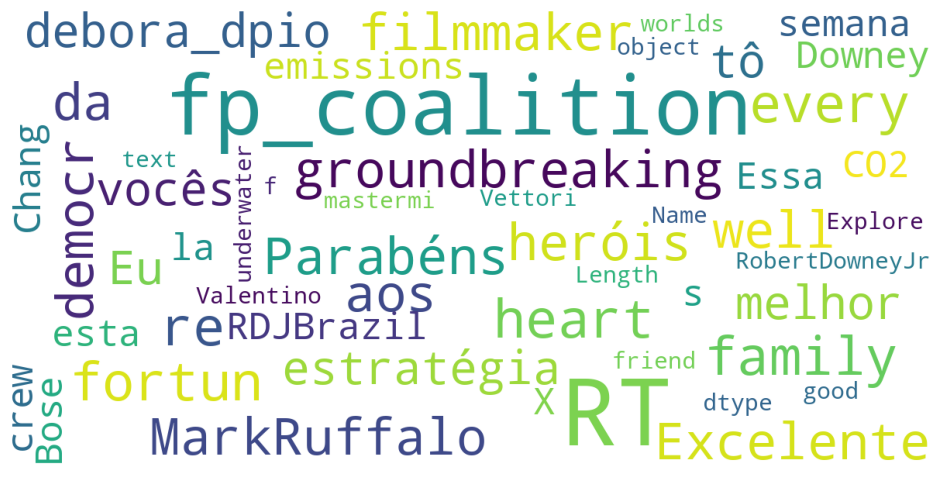

In [10]:
plotWordCloud(data['text'])